<a href="https://colab.research.google.com/github/luiscarlosm33/SIM_YAC_UPSE2023/blob/main/Copy_of_Untitled82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# Simulador ecuacion de la difusividad 
import numpy as np
import math
L=1000 #distancia total 
dx=100 #delta x
Distance=np.arange(0,L+1,dx) #Crear un vector de las distancias
P01=np.ones_like(Distance) #Vector inical de Presiones 
print(P01)


[1 1 1 1 1 1 1 1 1 1 1]


In [72]:
PYac=0
PFrontd=0 #Frontera derecha
PFronti=1000 #Frontera izquierda
Tiempo=20000
DT=100
VectorTiempo=np.arange(0,math.floor(Tiempo/DT)*DT,DT)
PXX=np.zeros((math.floor(Tiempo/DT),len(Distance)))
Pdt=np.zeros_like(Distance)

In [73]:
PXX=np.zeros((math.floor(Tiempo/DT),len(Distance)))
print(PXX)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [74]:
P01=np.ones_like(Distance)
P01=P01*PYac
P01[0]=PFronti
P01[len(P01)-1]=PFrontd
P0in=P01 #Condicion inicial 
Pdt=P01 #Vector de resultados dt
t=DT #primera interaccion

In [75]:
print(P01)

[1000    0    0    0    0    0    0    0    0    0    0]


In [76]:
def Presdt(P1,P2,P3,deltat,deltax):
  return(((P1-2*P2+P3)/(deltax*deltax))*deltat)+P2 


In [77]:
Preal=np.ones_like(PXX)
Preal.shape
P0in.shape

(11,)

In [78]:
Preal.shape[1]

11

In [79]:
from mpmath import mp
def Prealsum(n,alpha,t,x,L,Pb1,Pini):
  sumpexc=0
  for i in range(n+1):
      sumpexc += (((-1)**n)/(2*n+1))*mp.exp((alpha*(2*n+1)**n *(math.pi**2)*t)/(4*L**2))*math.cos((2*n+1)*math.pi*x/2*L)
  Pexct=Pb1-(4*Pini/math.pi)*sumpexc
  return Pexct



In [80]:
Pexct=Prealsum(100,1,10,10,100,50,0)
print(Pexct)

50.0


In [81]:
# Ecuacion de la difusividad solucion Real 
Preal=np.ones_like(PXX)
PXX[0]=P0in
for j in range(0,Preal.shape[1]-1):
  for i in range(0,len(P0in)-1):
    k=1
    Preal[j][i]=Prealsum(100,1,j*DT,i*dx,L,1000,0)


In [82]:
Preal

array([[1000., 1000., 1000., ..., 1000., 1000.,    1.],
       [1000., 1000., 1000., ..., 1000., 1000.,    1.],
       [1000., 1000., 1000., ..., 1000., 1000.,    1.],
       ...,
       [   1.,    1.,    1., ...,    1.,    1.,    1.],
       [   1.,    1.,    1., ...,    1.,    1.,    1.],
       [   1.,    1.,    1., ...,    1.,    1.,    1.]])

In [83]:
PXX[0]=P01
while t<Tiempo:
    for i in range(0,len(P0in)-1):
      if i==0:
        Pdt[i]=P0in[0]
      elif i==len(P0in)-1:
        Pdt[i]=P0in[len(P0in)-1]
      else:
        Pdt[i]=Presdt(P0in[i-1],P0in[i],P0in[i+1],DT,dx)
    PXX[math.floor(t/DT)]=Pdt
    t=t+DT
    P0in=Pdt
    P01=np.append(P01,Pdt)


In [84]:
PXX


array([[1000.,    0.,    0., ...,    0.,    0.,    0.],
       [1000.,   10.,    0., ...,    0.,    0.,    0.],
       [1000.,   19.,    0., ...,    0.,    0.,    0.],
       ...,
       [1000.,  559.,  235., ...,    0.,    0.,    0.],
       [1000.,  560.,  236., ...,    0.,    0.,    0.],
       [1000.,  561.,  237., ...,    0.,    0.,    0.]])

In [85]:
PXX.shape


(200, 11)

In [86]:
Distance.shape

(11,)

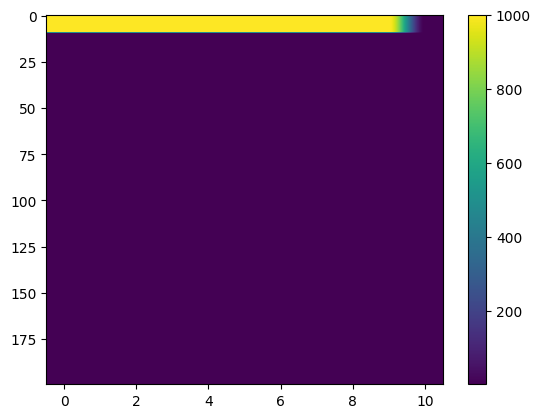

In [87]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Preal,aspect='auto')
plt.colorbar()

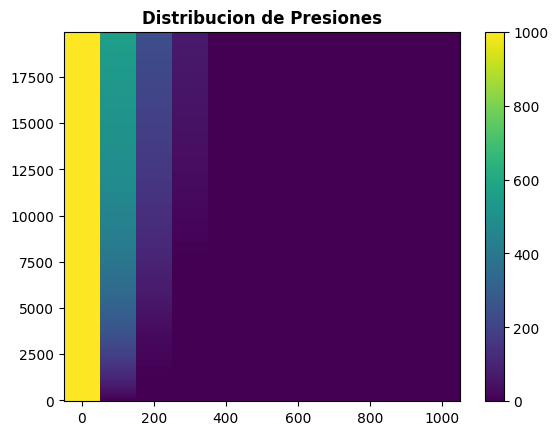

In [88]:

c = plt.pcolormesh(Distance,VectorTiempo,PXX)
plt.colorbar(c)
 
plt.title('Distribucion de Presiones', fontweight ="bold")
plt.show()

In [94]:
PXX.shape


(200, 11)

In [89]:
math.pi

3.141592653589793

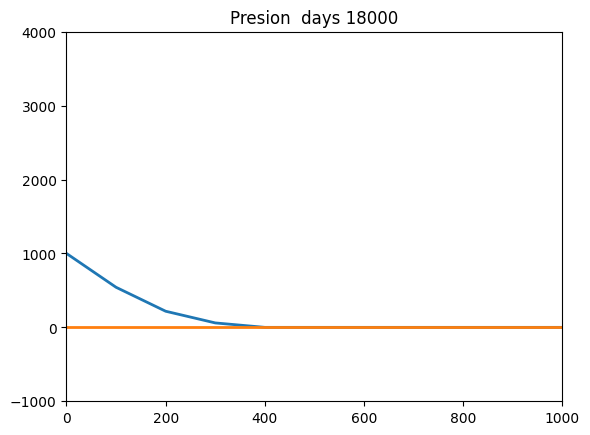

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.animation as animation


# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1000))
ax.set_ylim((-1000, 4000))

line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def init():
    line2.set_data([], [])
    return (line2,)

# animation function. This is called sequentially
def animate(i):
    x = Distance
    y = PXX[i]
    y2=Preal[i]
    line.set_data(x, y)
    line2.set_data(x, y2)
    ax.set(title='Presion  days ' + str(i*DT))
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,200,20), interval=200, blit=True)

HTML(anim.to_html5_video())